# IMPORTAÇÃO DAS BIBLIOTECAS E DOS DADOS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
alunos = pd.read_excel('/content/C+¦pia de aprovacao_alunos.xlsx')
alunos.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


# ANALISANDO OS DADOS

In [ ]:
alunos.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [ ]:
alunos.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [ ]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


<Axes: xlabel='ano_2015', ylabel='Count'>

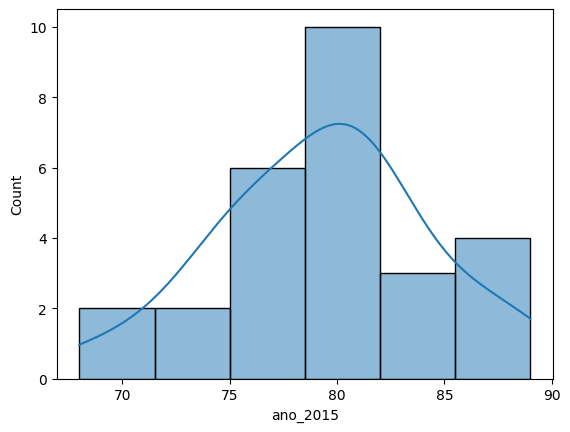

In [ ]:
sns.histplot(data=alunos, x='ano_2015', kde = True)

<Axes: xlabel='ano_2016', ylabel='Count'>

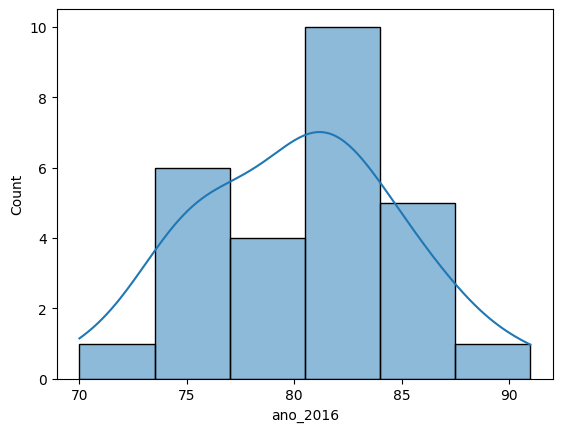

In [ ]:
sns.histplot(data=alunos, x='ano_2016', kde=True)

<Axes: xlabel='ano_2015', ylabel='ano_2016'>

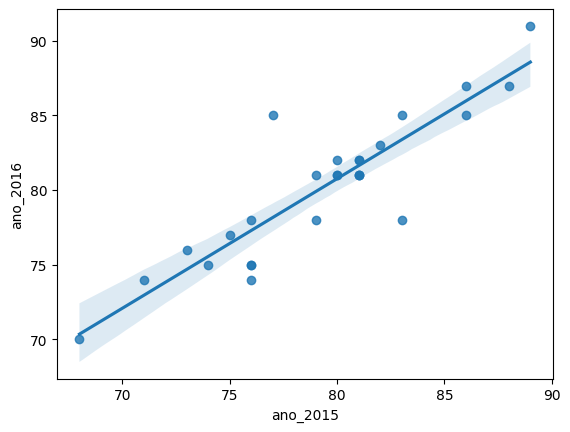

In [ ]:
sns.regplot(data = alunos, x = 'ano_2015', y = 'ano_2016')

# NORMALIZANDO OS DADOS

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
alunos_norm = pd.DataFrame(scaler.fit_transform(alunos), index=alunos.index, columns=alunos.columns)
alunos_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


#MODELO OLS

In [ ]:
import statsmodels.formula.api as smf
function = 'ano_2016~ano_2015 - 1'
model = smf.ols(formula=function, data = alunos_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               ano_2016   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              707.2
Date:                Tue, 26 Mar 2024   Prob (F-statistic):                    2.21e-20
Time:                        14:58:13   Log-Likelihood:                          23.670
No. Observations:                  27   AIC:                                     -45.34
Df Residuals:                      26   BIC:                                     -44.04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#MODELO SKLEARN

##TREINANDO O MODELO


In [ ]:
x = alunos_norm[['ano_2015']]
y = alunos_norm[['ano_2016']]

In [ ]:
#SEPERANDO OS DADOS DE TREINO E TESTE
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [ ]:
#CRIANDO UM OBJETO DE REGRESSÃO LINEAR
rl = LinearRegression()

In [ ]:
#TREINANDO O MODELO
rl.fit(x_treino,y_treino)

LinearRegression()

#Agora vamos tirar as métricas para ver como está se comportando o treino

In [ ]:
r_sq=rl.score(x_treino, y_treino)
print(f'Coeficiente de Determinação (R²): {r_sq}')

Coeficiente de Determinação (R²): 0.8800910056640281


#Vamos comparar quanto o treino preditivo está distante do y de treino original:

In [ ]:
y_pred_treino = rl.predict(x_treino)
print('MAE: ',metrics.mean_absolute_error(y_treino, y_pred_treino))
print('MSE: ',metrics.mean_squared_error(y_treino, y_pred_treino))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE:  0.06313092719197842
MSE:  0.006947385853516443
RMSE:  0.08335097991935334


In [ ]:
y_pred = rl.predict(x_teste)
print('MAE: ',metrics.mean_absolute_error(y_teste, y_pred))
print('MSE: ',metrics.mean_squared_error(y_teste, y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_teste, y_pred)))

MAE:  0.10156392395533688
MSE:  0.02234792217796548
RMSE:  0.14949221443929941
